#  Factor Prediction
---
In this notebook, I analyze the predictive ability of various factors both idenified by Eugene Fama and Ken French (see `/data/FF_5_Factors_Description.txt` for more information) and derived from return data. The overall objective is to determine whether a certian stock's returns (IBM, International Business Machines) can be predicted with consistency on a monthly basis using the identified factors. The primary prediction method used in this experiment is multiple OLS regression.

In [49]:
# File Imports
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from ISLP.models import (
    ModelSpec as MS
)

# Package Settings
plt.style.use('ggplot')

In [ ]:
# Read the factor data
factor_data = pd.read_csv("data/FF_5_Factors.csv")
factor_data['Date'] = pd.to_datetime(factor_data['Date'], format="%Y%m")
factor_data.set_index('Date', inplace=True)

# Download the market portfolio
market_data = yf.download('IBM', period='max', interval='1mo', auto_adjust=True)['Close']
factor_data['IBM'] = market_data.pct_change()

# Derived factors
factor_data['Vol'] = factor_data['IBM'].rolling(12).std()
# ADD Momentum (IBM)
# ADD Rolling Beta

factor_data.dropna(inplace=True, axis=0)
print(factor_data)

[*********************100%***********************]  1 of 1 completed

            Mkt-RF   SMB   HML   RMW   CMA    RF   MOM       IBM       Vol
Date                                                                      
1964-06-01    1.27  0.29  0.62 -0.28 -0.17  0.30  0.46 -0.005998  0.038866
1964-07-01    1.74  0.50  0.75  0.08  1.91  0.30 -0.35 -0.031446  0.041577
1964-08-01   -1.44  0.41  0.08  0.12  0.35  0.28 -0.22 -0.046536  0.046417
1964-09-01    2.69 -0.34  1.70 -0.56  0.62  0.28 -0.41 -0.008812  0.047111
1964-10-01    0.59  0.87  1.17 -0.43  0.47  0.29  0.08 -0.037800  0.042855
...            ...   ...   ...   ...   ...   ...   ...       ...       ...
2024-08-01    1.61 -3.65 -1.13  0.85  0.86  0.48  4.79  0.051993  0.068275
2024-09-01    1.74 -1.02 -2.59  0.04 -0.26  0.40 -0.60  0.103318  0.067632
2024-10-01   -0.97 -0.88  0.89 -1.38  1.03  0.39  2.87 -0.064954  0.074635
2024-11-01    6.51  4.78 -0.05 -2.62 -2.17  0.40  0.90  0.100087  0.074925
2024-12-01   -3.17 -3.87 -2.95  1.82 -1.10  0.37  0.05 -0.025713  0.076975

[727 rows x 9 columns]


#### Exploratory Analysis
---
To start, I begin by assessing the relationships between the data. From observing the correlation matrix, we can see that there are no significant correlations among data pairs (besided Mkt-RF and Mkt-Ret).

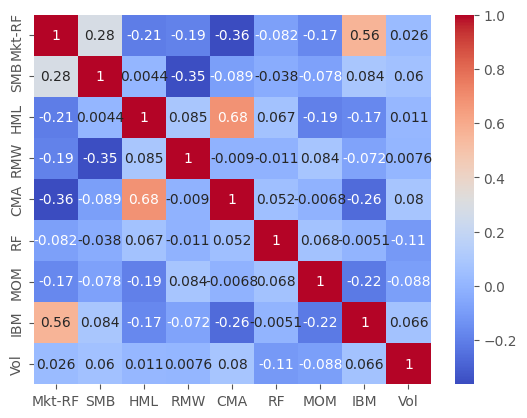

In [55]:
# Correlation matrix
corr_matrix = factor_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

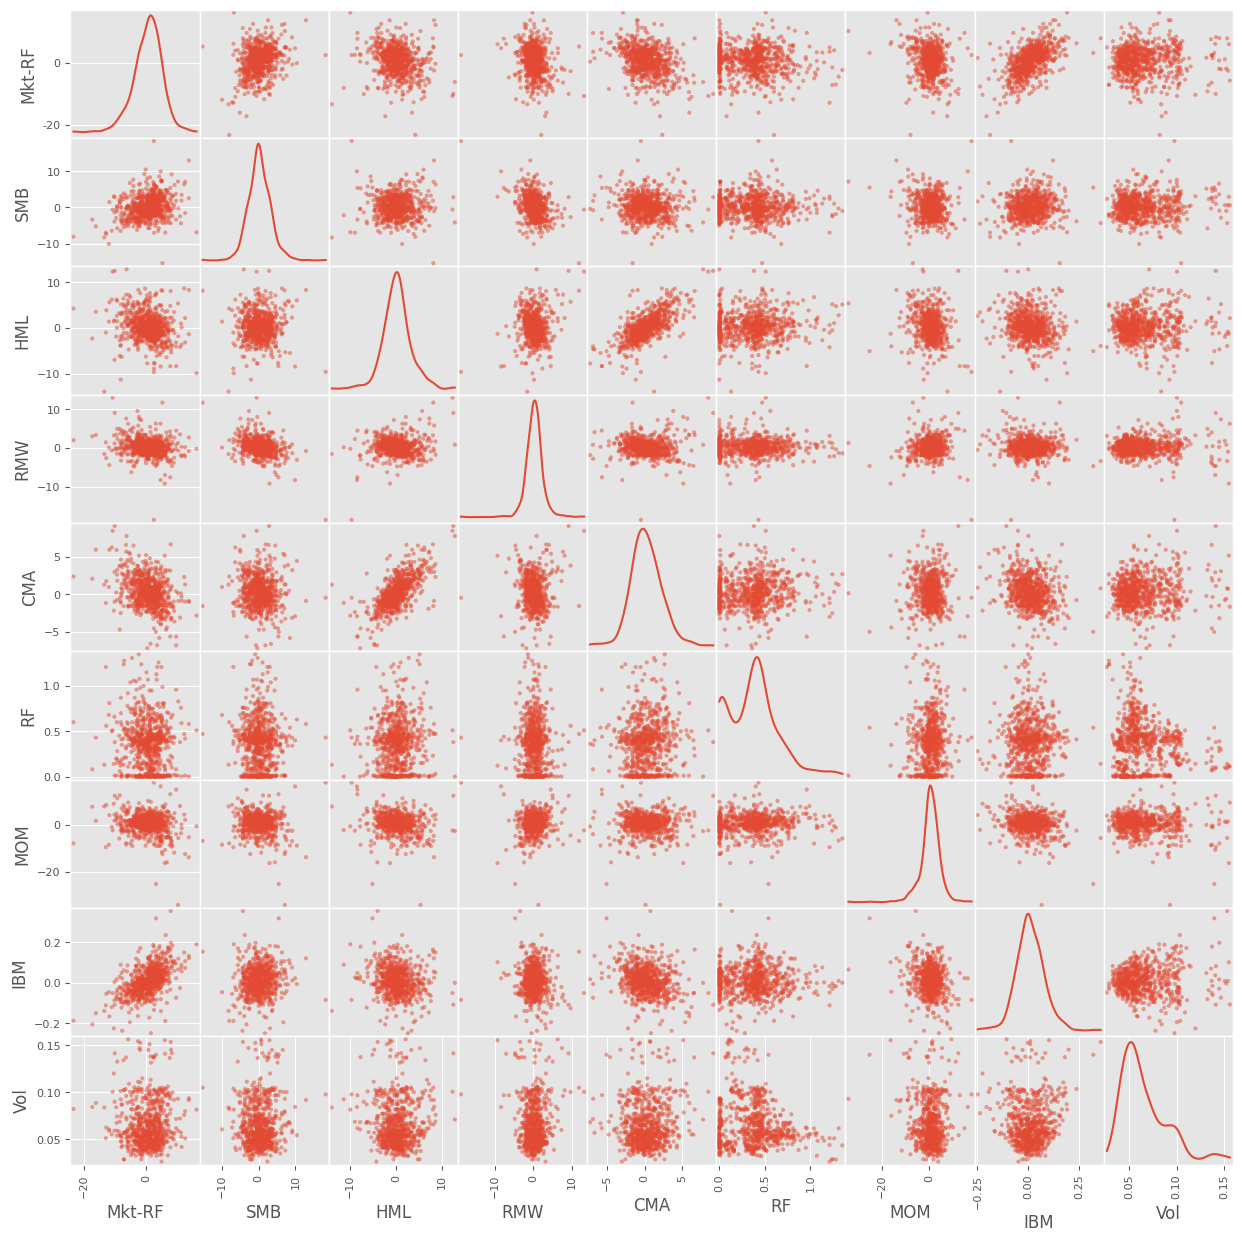

In [56]:
# Scatterplot matrix
pd.plotting.scatter_matrix(factor_data, figsize=(15, 15), diagonal='kde')
plt.show()

#### 1. Is there a relationship between the daily factors and the market returns?

In [57]:
predictors = []
X = MS(predictors).fit_transform(factor_data)
y = factor_data['IBM']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    IBM   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 16 Apr 2025   Prob (F-statistic):                nan
Time:                        06:02:11   Log-Likelihood:                 913.92
No. Observations:                 727   AIC:                            -1826.
Df Residuals:                     726   BIC:                            -1821.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0092      0.003      3.586      0.0